<a href="https://colab.research.google.com/github/rafaelmattos/Introducao-a-Ciencias-de-Dados/blob/main/Aula5_arvores_avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MBA em Ciência de Dados: Árvores e avaliação

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2023.

<hr>

Vamos inicialmente ler os dados:

In [4]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/Vehicle.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns[0:-2])
# mostra os dados
data.head(10)

Número de linhas e colunas na matriz de atributos: (846, 19)


,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


Construímos as variáveis $X$ e $y$, sendo que o processo classificação se resume em estimar a função $f$ na relação $y = f(X) + \epsilon$, onde $\epsilon$ é o erro, que tem distribuição normal com média igual a zero e variância $\sigma^2$.

Convertemos para o formato Numpy pra facilitar a manipulação dos dados.

In [5]:
data_np = data.to_numpy()
nrow,ncol = data_np.shape
y = data_np[:,-1]
X = data_np[:,0:ncol-1]

Para treinar o classificador, precisamos definir o conjunto de teste e treinamento.

In [6]:
from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p,
                                                    random_state = 2)

A partir desse conjunto de dados, podemos realizar a classificação.

## Árvores de decisão

Árvores de decisão podem ser construidas de diferentes formas, considerando diferentes métodos e medidas, como vimos na aula. Vamos incialmente construir a árvore usando o critério Gini:

In [7]:
from sklearn import tree
# Cria o modelo usando o criterio Gini
model = tree.DecisionTreeClassifier(criterion = 'gini',
                                    random_state = 101)
# Ajusta o modelo usando os dados de treinamento
model.fit(X_train,y_train)
# realizar a predição
y_pred = model.predict(X_test)

Usando a medida de acurácia, avaliamos o desempenho do modelo no aprendizado.

In [8]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

Accuracy: 0.7058823529411765


Podemos visualizar a árvore.

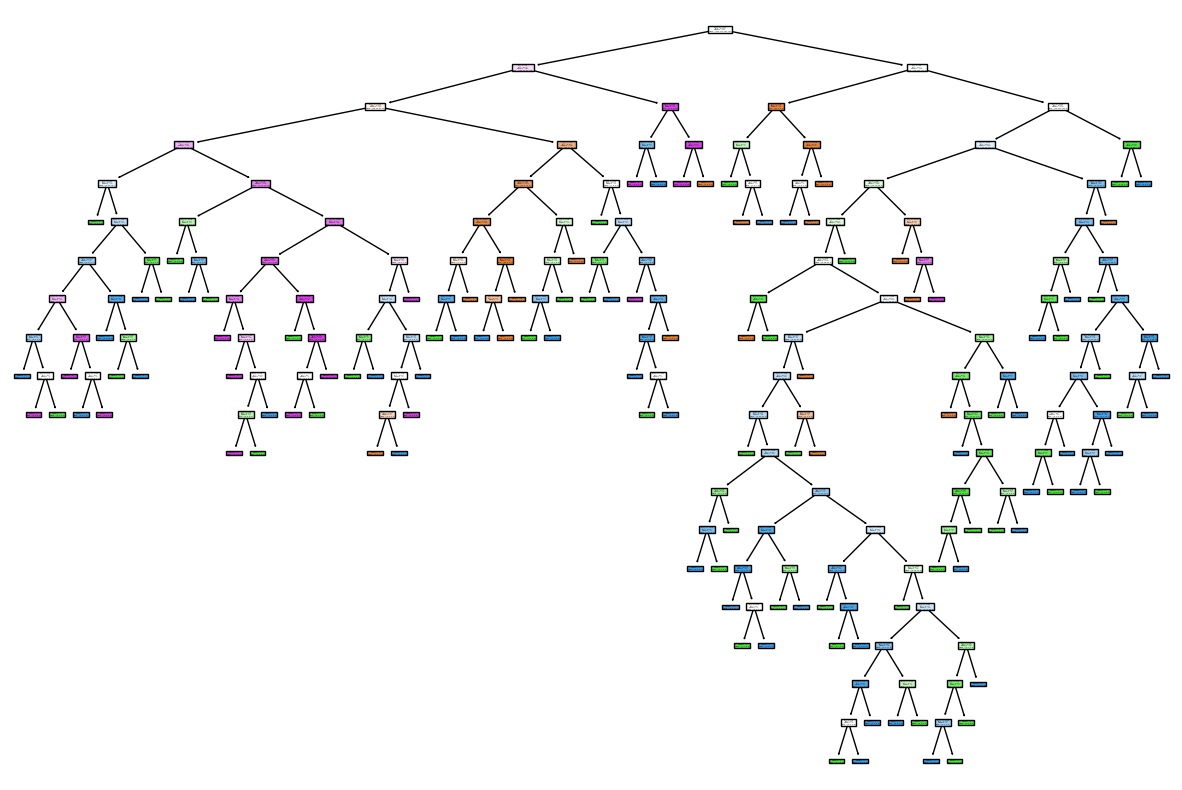

In [9]:
plt.figure(figsize=(15,10))
tree.plot_tree(model.fit(X_train,y_train),filled=True)
plt.show(True)

Se usarmos a medida de entropia:

In [10]:
from sklearn import tree
from sklearn.metrics import accuracy_score

model = tree.DecisionTreeClassifier(criterion = 'entropy',
                                    random_state = 101)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

Accuracy: 0.7588235294117647


Mostrando a respectiva árvore.

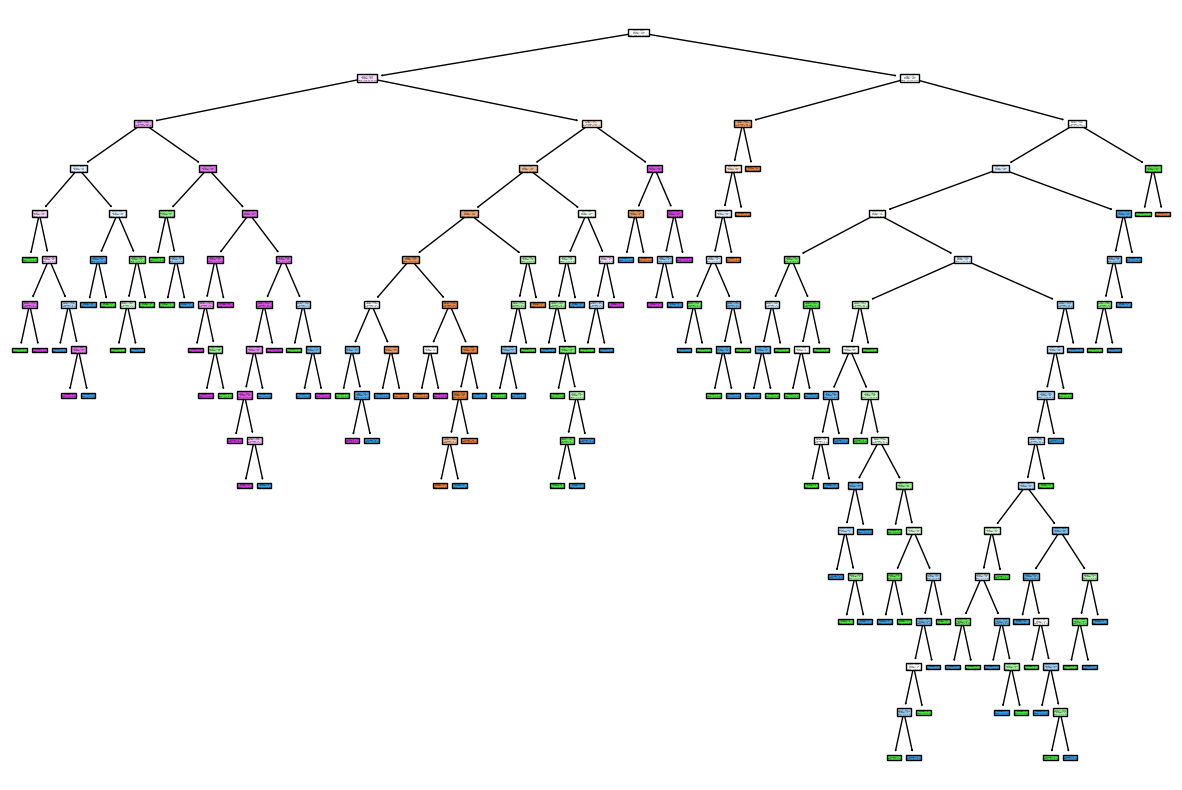

In [11]:
plt.figure(figsize=(15,10))
tree.plot_tree(model.fit(X_train,y_train), filled=True)
plt.show(True)

Podemos também limitar o tamanho da árvore, o que influencia no resultado. Quem controla esse tamanho é o hiperparâmetro max_depth.

In [12]:
from sklearn import tree
from sklearn.metrics import accuracy_score

# cria o modelo com número máximo de níveis max_depth
model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
# ajusta aos dados de treinamento
model.fit(X_train,y_train)
# faz a predição usando os dados de teste
y_pred = model.predict(X_test)
# calcula a acurácia
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

Accuracy: 0.5470588235294118


Visualizando a estrutura da árvore, vemos que há menos níveis do que a anterior.

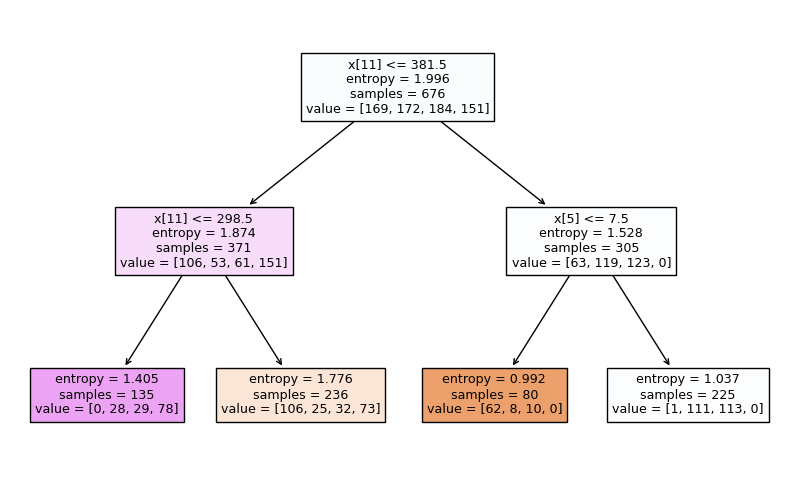

In [13]:
plt.figure(figsize=(10,6))
tree.plot_tree(model.fit(X_train,y_train),filled=True)
plt.show(True)

Veja a implementação original e estude os parâmetros do modelo: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Florestas aleatórias

O método florestas aleatórias considera amostragem de observações e atributos. Vamos realizar a classificação.

In [14]:
from sklearn.ensemble import RandomForestClassifier

# define os parâmetros do modelo
model=RandomForestClassifier(n_estimators=100, bootstrap=True,
                             class_weight=None,
                             criterion='gini',
                             max_depth=None,
                             max_features='sqrt',
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_jobs=1,
                             oob_score=False,
                             random_state=None, verbose=0,
                             warm_start=False)
model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

Accuracy: 0.7823529411764706


Os hiperparâmetros do método: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Podemos analisar como o número de árvores influencia no resultado.

Number of Estimators: 1 Accuracy: 0.7235294117647059
Number of Estimators: 11 Accuracy: 0.7705882352941177
Number of Estimators: 21 Accuracy: 0.7705882352941177
Number of Estimators: 31 Accuracy: 0.7529411764705882
Number of Estimators: 41 Accuracy: 0.7823529411764706
Number of Estimators: 51 Accuracy: 0.7647058823529411
Number of Estimators: 61 Accuracy: 0.8058823529411765
Number of Estimators: 71 Accuracy: 0.7764705882352941
Number of Estimators: 81 Accuracy: 0.7941176470588235
Number of Estimators: 91 Accuracy: 0.7705882352941177
Melhor n: 61  com acurácia: 0.8058823529411765


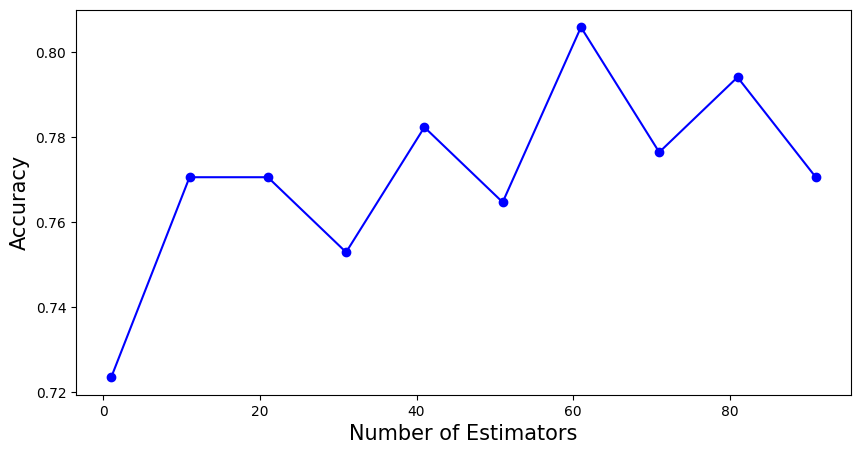

In [21]:
vscore = []
vn = []
for n in range(1,100,10):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

O algoritmo radom forest permite ainda quantificar a importância de cada variável na classificação. Quanto maior esse valor, mais o atributo influencia na classificação. Vejam que a soma dos pesos é igual a um.

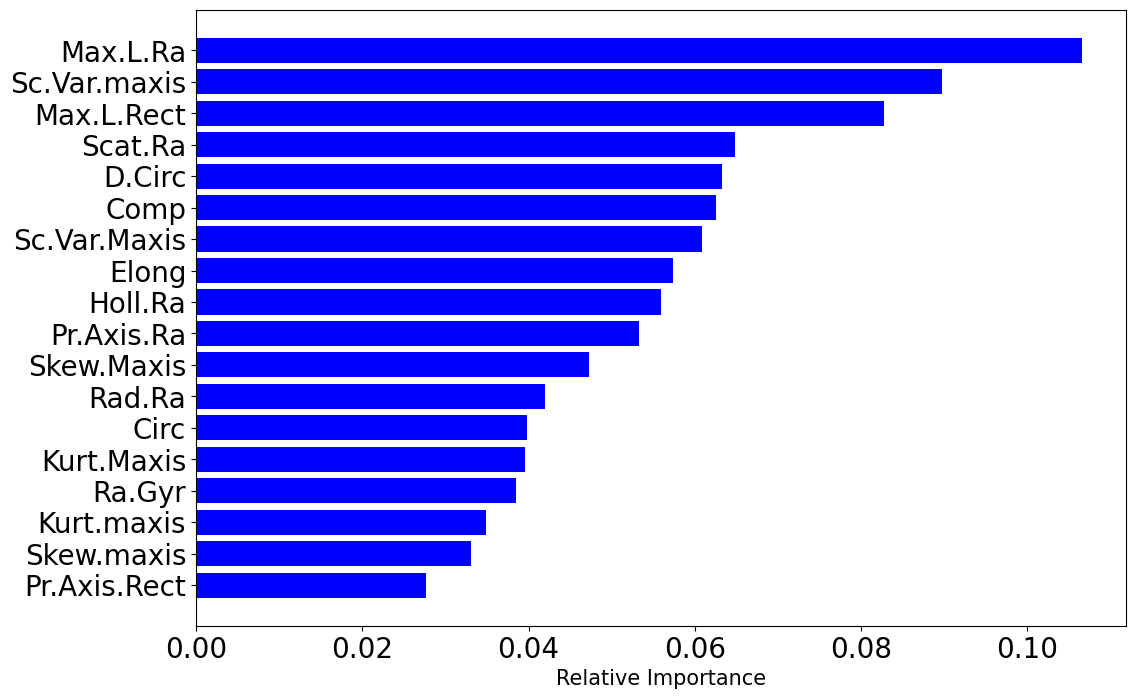

In [22]:
importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(features_names[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()

Com isso, podemos fazer uma ordenação dos atributos e selecionar apenas os mais importantes.

## Avaliação de classificadores

Inicialmente, vamos considerar uma base com apenas duas classes.

In [23]:
import random
random.seed(1) # define the seed (important to reproduce the results)
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV file
data = pd.read_csv('data/BreastCancer.csv', header=(0))

data = data.dropna(axis='rows') #remove NaN
classes = pd.unique(data[data.columns[-1]]) #name of the clases
classes = np.array(classes, dtype=str) # convert to an array

print(data.shape)
feature_names = list(data.columns)
data.head(10)

(683, 11)


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
5,1017122,8,10,10,8,7,10.0,9,7,1,1
6,1018099,1,1,1,1,2,10.0,3,1,1,0
7,1018561,2,1,2,1,2,1.0,3,1,1,0
8,1033078,2,1,1,1,2,1.0,1,1,5,0
9,1033078,4,2,1,1,2,1.0,2,1,1,0


In [24]:
data_np = data.to_numpy()
nrow,ncol = data_np.shape
y = data_np[:,-1]
X = data_np[:,0:ncol-1]

Vamos selecionar os conjuntos de treinamento e teste.

In [25]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
p = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 2)

Realizando a padronização dos dados.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Vamos considerar um método de classificação e fazer a predição das classes.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
model = RandomForestClassifier(n_estimators = 50)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [28]:
y_pred = model.predict(X_test)

Com a predição, podemos fazer a avaliação dos resultados usando diferentes métricas.

A acurácia é dada pela fração de elementos classificados corretamente.

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9689213893967094


A matriz de confusão permite verificar a relação entre as classes preditos e os originais.

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,345,15,360
1.0,2,185,187
All,347,200,547


Há diversas outras métricas que podem quantificar a qualidade de uma classificação.

In [33]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))
print('\n clasification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9689213893967094
F1 score: 0.9660135448760823
Precision: 0.9596181556195966
Recall: 0.973819073083779

 clasification report:
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       360
         1.0       0.93      0.99      0.96       187

    accuracy                           0.97       547
   macro avg       0.96      0.97      0.97       547
weighted avg       0.97      0.97      0.97       547



A medida F1 é a média harmônica entre as medidas Precision e Recall:
$$
    {\displaystyle F_{1}={\frac {2}{\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}}=2{\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}={\frac {2\mathrm {tp} }{2\mathrm {tp} +\mathrm {fp} +\mathrm {fn} }}}.
$$
Se a Precision ou a Recall é igual a zero, então F1 será zero, pois o denominador será igual a infinito. Se forem iguais a um, então F1 também será igual a 1, indicando uma clasificação sem erro.

Podemos calcular também a medida AUC (área sob a curva ROC).

In [34]:
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print('AUC:', auc)

AUC: 0.9856803327391562


### Exercícios de fixação

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

1 - Repita todos os passos acima para a base de dados BreastCancer.

2 - Considerando a base de dados Vehicle, calcule as métricas de avaliação vistas nessa aula para os classificadores árvores de decisão e florestas aleatórias.

3 - Faça a classificação dos dados gerados artificialmente com o código abaixo. Compare os resultados para os métodos vistos nessa aula.

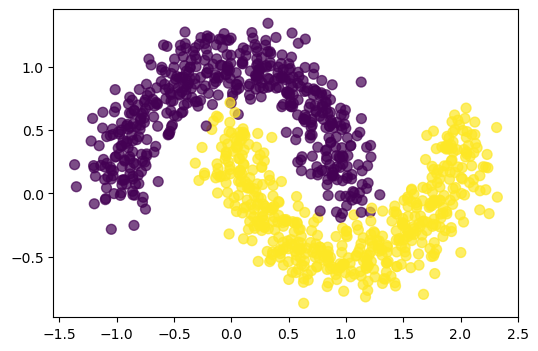

In [ ]:
from sklearn import datasets
plt.figure(figsize=(6,4))

n_samples = 1000

data  = datasets.make_moons(n_samples=n_samples, noise=.15)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)